In [1]:
from colorsys import hls_to_rgb

import jax as jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from jax.numpy import pi

from chromatix.utils.data import pollen_3d

In [2]:
# CC nadapez: from https://stackoverflow.com/a/20958684
def colorize(arr, normalize=True, gamma=0.3):
    z = arr
    r = np.abs(z)
    if normalize:
        r = r / np.max(r)

    arg = np.angle(z)

    hue = (arg + pi) / (2 * pi) + 0.5
    lightness = 1.0 - 1.0 / (1.0 + r**gamma)
    saturation = 0.8

    c = np.vectorize(hls_to_rgb)(hue, lightness, saturation)  # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0, 2)
    c = c.swapaxes(0, 1)
    return c

## Generate a 3D sample with a synthetic pollen



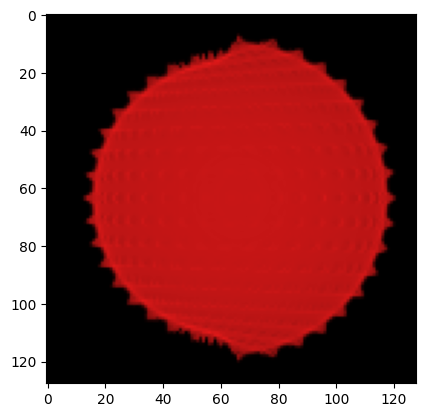

In [3]:
arr = pollen_3d([128, 128, 128], filled=True)
arr_p = jnp.sum(arr, axis=1)
plt.imshow(colorize(arr_p))
# np.max(arr_p)

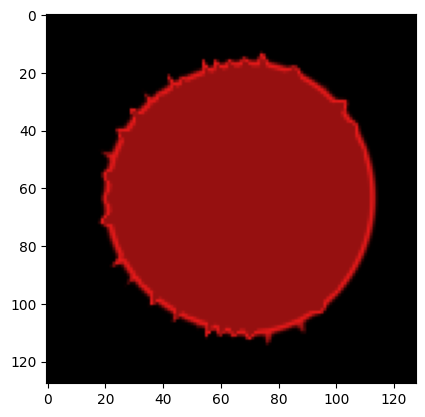

In [4]:
z = 84
plt.imshow(colorize(arr[:, z, :]))